## Grupo 23

**Nombre:** Raúl Miguel Carrero Martín 
**Nia**: 100451286 
**Grupo de clase**: 81

**Nombre:** Gonzalo Vela Sacristán
**Nia**: 100472334
**Grupo de clase**: 84

# 1.- Importación de las librerias y los datos

## 1.1.- Importar las librerias

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import pickle
import matplotlib.pyplot as plt

# Librerías de métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier


## 1.2.- Importar los datos

Primero obtenemos los datos del csv ***wind_ava.csv*** en un data frame mediante la función `pd.read_csv()`. 

In [18]:
data = pd.read_csv("data/wind_ava.csv")
display(data)

,datetime,energy,p54.162.1,p54.162.2,p54.162.3,p54.162.4,p54.162.5,p54.162.6,p54.162.7,p54.162.8,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,2005-01-02 18:00:00,402.71,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,2.502537e+06,2.531111e+06,2.522721e+06,2.514330e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,2005-01-03 00:00:00,696.80,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,2.504995e+06,2.533465e+06,2.525088e+06,2.516716e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,2005-01-03 06:00:00,1591.15,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,2.501629e+06,2.529801e+06,2.521496e+06,2.513187e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,2005-01-03 12:00:00,1338.62,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,2.502732e+06,2.530569e+06,2.522346e+06,2.514127e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,2005-01-03 18:00:00,562.50,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,2.497861e+06,2.525621e+06,2.517421e+06,2.509215e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.407224e+06,2.400131e+06,2.393033e+06,2.385939e+06,2.378841e+06,2.403709e+06,2.396344e+06,2.388984e+06,...,9.377886,9.271118,9.164849,9.058080,8.951312,9.402832,9.291075,9.179816,9.068059,8.956800
4744,2009-12-30 12:00:00,855.00,2.407234e+06,2.400117e+06,2.393001e+06,2.385885e+06,2.378768e+06,2.403700e+06,2.396317e+06,2.388935e+06,...,7.345796,7.500461,7.655624,7.810288,7.964953,7.457055,7.604734,7.751915,7.899595,8.047274
4745,2009-12-30 18:00:00,117.06,2.401034e+06,2.393683e+06,2.386332e+06,2.378981e+06,2.371630e+06,2.397510e+06,2.389888e+06,2.382270e+06,...,3.485674,3.535566,3.585458,3.635349,3.685241,3.505132,3.552030,3.598429,3.645328,3.691727
4746,2009-12-31 12:00:00,516.96,2.393873e+06,2.386499e+06,2.379125e+06,2.371752e+06,2.364378e+06,2.390276e+06,2.382632e+06,2.374982e+06,...,1.988424,2.123630,2.258837,2.394043,2.529749,1.960983,2.094194,2.226906,2.360117,2.492829


Como se ha hecho en los cuadernos anteriores se eliminan las columnas que no sean *datetime*, *energy* o contengan *.13* en el nombre.

In [19]:
# Eliminamos todas las columnas excepto datetime, energy y las que no contengan .13 en el nombre
data = data.filter(regex='datetime|energy|\.13')
display(data)

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,1280.13,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
4744,2009-12-30 12:00:00,855.00,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
4745,2009-12-30 18:00:00,117.06,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993
4746,2009-12-31 12:00:00,516.96,2.371697e+06,13.048144,12.580268,1.376913e+06,2.347799,2.434291,5.278912,0.771754,...,279.662858,281.153379,281.976385,0.705886,0.192834,285.904895,0.426707,-5.693542,8.374951,2.219422


# 2.- Problema de clasificación

## 2.1.- Preparación de los datos

Según se ha especificado en el enunciado se dividen los valores de la energía en alto y bajo según el tercer cuantil, esto supone que se desbalanceen los datos, teniendo mas instancias de la clase bajo que de la clase alto.

In [20]:
# Convertir el valor de la energia de data en "bajo" o "alto" segun el tercer cuantil para convertirlo en un problema de clasificacion
print('quantile:', data['energy'].quantile(0.75))
cls_data = data.copy()
cls_data['energy'] = np.where(cls_data['energy'] > cls_data['energy'].quantile(0.75), 'alto', 'bajo')
display(cls_data)

quantile: 1089.375


,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,bajo,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,bajo,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,alto,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,alto,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,bajo,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,2009-12-30 06:00:00,alto,2.385772e+06,14.413342,24.971074,3.905586e+06,2.349839,2.434994,4.595786,5.563189,...,280.731326,282.643490,281.676560,0.628948,0.879581,286.013271,0.424510,-5.715421,6.922743,9.179816
4744,2009-12-30 12:00:00,bajo,2.385708e+06,12.802883,60.248874,2.745694e+06,2.349446,2.434849,4.894838,5.577096,...,283.310687,282.370909,281.761750,0.740926,0.699769,285.988737,0.424762,-5.732455,7.434887,7.537381
4745,2009-12-30 18:00:00,bajo,2.379049e+06,10.915997,3.145067,2.254171e+06,2.349054,2.434715,0.958361,0.948029,...,281.060085,282.425812,281.841961,0.109802,0.125174,285.968452,0.415132,-5.866856,3.033799,3.568993
4746,2009-12-31 12:00:00,bajo,2.371697e+06,13.048144,12.580268,1.376913e+06,2.347799,2.434291,5.278912,0.771754,...,279.662858,281.153379,281.976385,0.705886,0.192834,285.904895,0.426707,-5.693542,8.374951,2.219422


Realizamos la transformación de la variable "energía" en un problema de clasificación binaria cambiandola por "alto" y "bajo". Calculamos el tercer cuartil (el valor que divide los datos en tres partes iguales, dejando el 25% de los datos por debajo y el 75% por encima). Si el valor de energía es mayor que el tercer cuartil, se asigna la etiqueta "alto" sino "bajo". Para el problema de clasificación, la energía la convertimos en una variable categórica ("bajo" o "alto") en lugar de una variable numérica continua. Esto transforma el problema de regresión en uno de clasificación binaria, donde el objetivo es predecir si la energía producida será "baja" o "alta" en función de las características.

#### Outer Loop

In [21]:
# Dividimos el dataset en variables de datos y variable target
# Dividimos el dataset en entrenamiento y test
# Guardamos los datos en x
X_data = cls_data.copy()
X_data = X_data.drop(columns='datetime')
y_data = X_data.pop('energy')
# X_train son los datos desde el principio hasta 31-12-2007
X_train = cls_data[cls_data['datetime'] < '2008-01-01']
# X_test son los datos desde 01-01-2008 hasta el final
X_test = cls_data[cls_data['datetime'] >= '2008-01-01']
# Dropea la coluna datetime
X_train = X_train.drop(columns='datetime')
X_test = X_test.drop(columns='datetime')

# Guardamos la variable target en y
y_train = X_train.pop('energy')
y_test = X_test.pop('energy')


Siguiendo el modelo del eda y teniendo en cuenta las características de los datos, para la evaluación externa se observa que los datos son completos desde el inicio hasta 2008 conteniendo cada dia tres mediciones diferentes. Sin embargo, a partir de 2008 empiezan a faltar mediciones por lo que para una correcta evaluación del modelo se ha decidido dividir los datos en entrenamiento desde el dia 1 hasta el último dia de 2007, y en datos de test desde el primer dia de 2008 hasta el final de los datos.

#### Inner Loop

In [22]:
# stratified k-fold cross-validation
inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=100451286)

Al estar trabajando en un problema de clasificación, queremos asegurarnos de que nuestro modelo sea capaz de predecir correctamente todas las clases, especialmente si las clases están desbalanceadas. La validación cruzada nos ayuda a lograr esto al dividir nuestros datos en pliegues de entrenamiento y probar de esta manera que cada pliegue mantenga la misma proporción de muestras para cada clase que el conjunto de datos original. Usamos validación cruzada estratificada con 5 pliegues (n_splits=5). De semilla aleatoria hemos utilizado el NIA 100451286. Asímismo, no es utíl el uso de una *Time series split* ya que al tratarse de un problema de clasificación binaria no requiere para clasificar de resultados anteriores.

In [23]:
scores = []
accuracy_scores = []

## 2.3.- Modelos de clasificación

Primero creamos un modelo *Dummy* que servirá de modelo base, cualquier modelo que no supere las métricas de este, sera descartado.

In [24]:
# Modelo dummy
dummy = DummyClassifier(strategy='most_frequent')
# con cross_val_score obtenemos el score de la validación cruzada
dummy_score = cross_val_score(dummy, X_train, y_train, cv=inner, scoring='accuracy')
print('scores:', dummy_score.mean())

scores.append({'model': 'dummy', 'score': dummy_score.mean()})


scores: 0.7525350921697953


## 2.3.1.- KNN

Hacemos el ajuste de hiperparámetros.

In [25]:
# Modelo KNN con gridsearch y pipeline
pipe = Pipeline([('knn', KNeighborsClassifier())])

param_grid = {
    'knn__n_neighbors': np.arange(5,10, 2),
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(pipe, 
                    param_grid, 
                    cv=inner, 
                    verbose = 1, 
                    scoring='accuracy')

np.random.seed(100451286)
grid.fit(X_train, y_train)

print('Mejor score:', grid.best_score_)
print('Mejores parámetros:', grid.best_params_)

scores.append({'model': 'knn', 'score': grid.best_score_})

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejor score: 0.7667786609542064
Mejores parámetros: {'knn__n_neighbors': 9, 'knn__weights': 'uniform'}


Evaluamos el rendimiento futuro

Accuracy: 0.7652411282984531
Balanced accuracy: 0.650157694634062
Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.56      0.41      0.48       284
        bajo       0.81      0.89      0.85       815

    accuracy                           0.77      1099
   macro avg       0.69      0.65      0.66      1099
weighted avg       0.75      0.77      0.75      1099



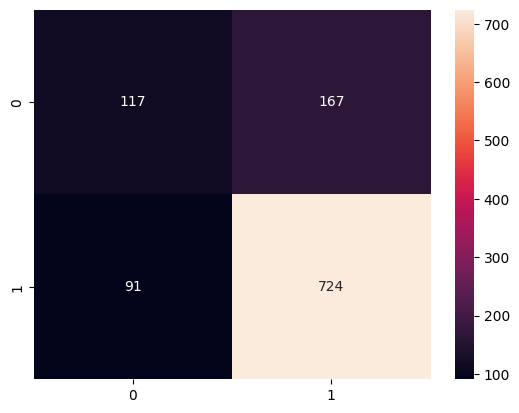

In [26]:
# Evaluamos el modelo
np.random.seed(100451286)
best_knn = grid.best_estimator_
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculamos la precisión balanceada
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print('Balanced accuracy:', balanced_accuracy)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

# Calculamos el reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

accuracy_scores.append({'model': 'knn', 'accuracy': accuracy, 'balanced_accuracy': balanced_accuracy})


## 2.3.2.- Arboles de decisión

Hacemos el ajuste de hiperparámetros.

In [27]:
# Grid search con decision tree y pipeline con estandarización
pipe = Pipeline([('dt', DecisionTreeClassifier(class_weight='balanced'))])

param_grid = {
    'dt__max_depth': np.arange(1, 6),
    'dt__min_samples_split': np.arange(3, 10),
    'dt__min_samples_leaf': np.arange(2, 10),
}

grid = GridSearchCV(pipe,
                    param_grid,
                    cv=inner,
                    verbose=1,
                    scoring='accuracy')

np.random.seed(100451286)
grid.fit(X_train, y_train)

print('Mejor score:', grid.best_score_)
print('Mejores parámetros:', grid.best_params_)

scores.append({'model': 'Decision tree', 'score': grid.best_score_})

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Mejor score: 0.8457135877633087
Mejores parámetros: {'dt__max_depth': 4, 'dt__min_samples_leaf': 9, 'dt__min_samples_split': 8}


Evaluamos el rendimiento futuro

Accuracy: 0.8462238398544131
Balanced accuracy: 0.8240538321956277
Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.68      0.78      0.72       284
        bajo       0.92      0.87      0.89       815

    accuracy                           0.85      1099
   macro avg       0.80      0.82      0.81      1099
weighted avg       0.86      0.85      0.85      1099



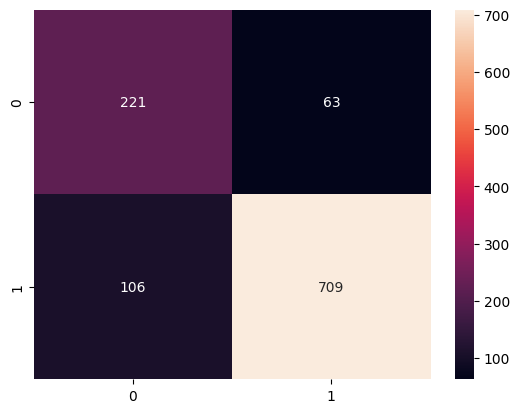

In [28]:
# Evaluamos el modelo
np.random.seed(100451286)
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculamos la precisión balanceada
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print('Balanced accuracy:', balanced_accuracy)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')


# Calculamos el reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

accuracy_scores.append({'model': 'Decision tree', 'accuracy': accuracy, 'balanced_accuracy': balanced_accuracy})

## 2.3.3.- Regresión Logística

Hacemos el ajuste de hiperparámetros.

In [29]:
# Modelo de regresión logística con gridsearch y pipeline y estaandarización
pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(class_weight='balanced'))])

param_grid = {
    'lr__C': np.logspace(-4, 4, 15),
    'lr__max_iter': np.arange(50, 100, 150)
}

grid = GridSearchCV(pipe,
                    param_grid,
                    cv=inner,
                    verbose=1,
                    scoring='accuracy')

np.random.seed(100451286)
grid.fit(X_train, y_train)

print('Mejor score:', grid.best_score_)
print('Mejores parámetros:', grid.best_params_)

scores.append({'model': 'Logistic regression', 'score': grid.best_score_})

Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\rauca\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\rauca\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Mejor score: 0.7489704417761243
Mejores parámetros: {'lr__C': 0.07196856730011514, 'lr__max_iter': 50}


c:\Users\rauca\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\rauca\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

Evaluamos el rendimiento futuro

Accuracy: 0.7506824385805277
Balanced accuracy: 0.7344011924306575
Reporte de clasificación:
              precision    recall  f1-score   support

        alto       0.51      0.70      0.59       284
        bajo       0.88      0.77      0.82       815

    accuracy                           0.75      1099
   macro avg       0.70      0.73      0.71      1099
weighted avg       0.79      0.75      0.76      1099



c:\Users\rauca\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


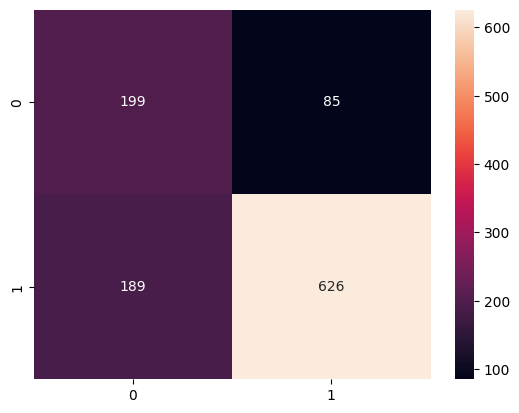

In [30]:
# Evaluamos el modelo
np.random.seed(100451286)
best_lr = grid.best_estimator_
best_lr.fit(X_train, y_train)
y_pred = best_lr.predict(X_test)

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculamos la precisión balanceada
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print('Balanced accuracy:', balanced_accuracy)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')


# Calculamos el reporte de clasificación
print('Reporte de clasificación:')
print(classification_report(y_test, y_pred))

accuracy_scores.append({'model': 'Logistic regression', 'accuracy': accuracy, 'balanced_accuracy': balanced_accuracy})


# 3.- Conclusiones

Tras evaluar con los diferentes modelos nos damos cuenta(como era de esperar al tener más datos de la clase bajos al dividir por el tercer cuantil) que siempre los estimadores son mejores los valores para la clase "bajo" que para la clase "alto", un mayor número de valores generalmente si los datos son correctos genera una mejor estimación del modelo.

La precisión para la clase "alto" es del 0.68, 0.51 y 0.56, lo que significa que las instancias clasificadas como "alto" por el modelo, realmente pertenecen en el 0.68, 0.51 y 0.56 a la clase "alto". Para la clase "bajo", la precisión es del 0.92, 0.88 y 0.81, lo que indica que el 0.92, 0.88 y 0.81 de las instancias clasificadas como "bajo" por el modelo realmente pertenecen a la clase "bajo".

El recall para la clase "alto" es del 0.7, 0.78, 0.41 lo que significa que el modelo identifica correctamente el 0.7, 0.78, 0.41 de todas las instancias de la clase "alto". Para la clase "bajo", el recall es del 0.77, 0.87, 0.89 lo que indica que el modelo identifica correctamente el 0.77, 0.87, 0.89 de todas las instancias de la clase "bajo".

Es útil cuando hay un desequilibrio es decir cuando hay más instancias de una clase que de otra, porque tiene en cuenta tanto los falsos positivos como los falsos negativos. En este caso, el F1-score para la clase "alto" es del 0.72, 0.59, 0.48 y para la clase "bajo" es del 0.89, 82, 0.85.


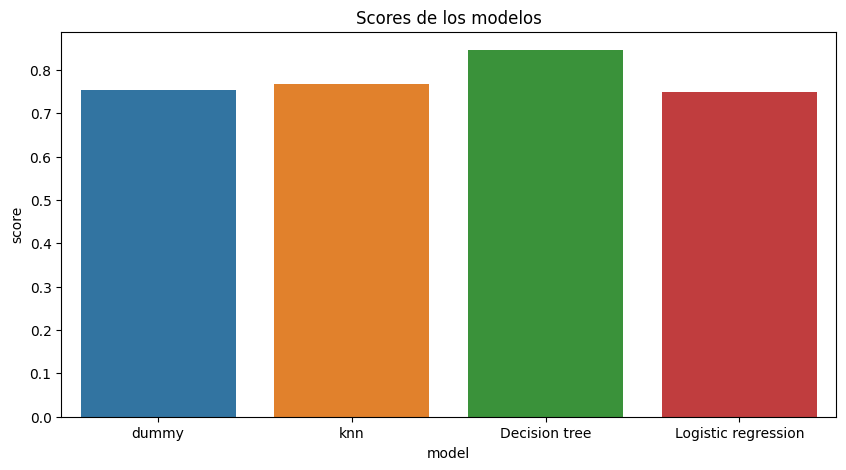

In [31]:
# Mostramos en una grafica las metricas obtenidas
scores_df = pd.DataFrame(scores)
# Graficamos los scores obtenidos
plt.figure(figsize=(10, 5))
sns.barplot(x='model', y='score', data=scores_df)
plt.title('Scores de los modelos')
plt.show()

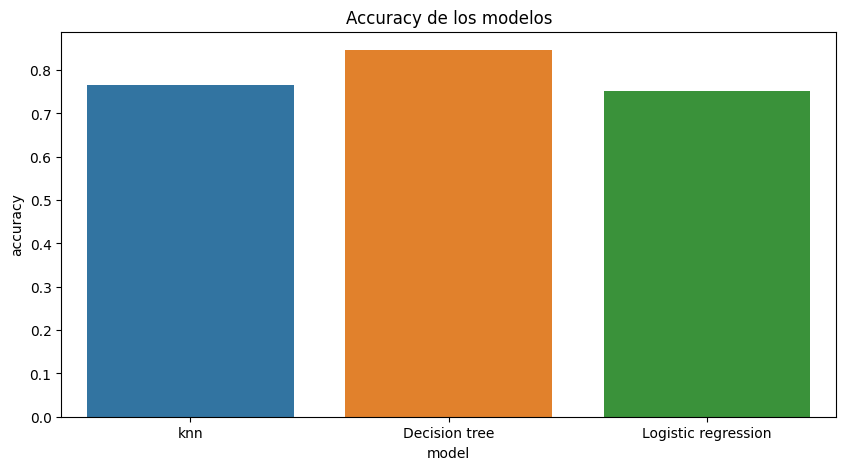

In [32]:
# Mostamos en una grafica las metricas obtenidas
accuracy_scores_df = pd.DataFrame(accuracy_scores)
# Graficamos los scores obtenidos
plt.figure(figsize=(10, 5))
sns.barplot(x='model', y='accuracy', data=accuracy_scores_df)
plt.title('Accuracy de los modelos')
plt.show()


Para evaluar los modelos con los scores y la accuracy de cada modelo nos tenemos que fijar en la que tenga un valor de score y accuracy más alto ya que indica un mayor rendimiento del modelo. Podemos ver que los tres modelos superan la base establecida con el modelo dummy, vemos también que el mejor modelo debido a el accuracy, es el Árbol de Decisión que ha demostrado ser el más efectivo en este conjunto de datos y para este problema de clasificación específico. Son valores de precisión altos por lo que el cambio a problema de clasificación ha aumentado en general el valor de la precisión de los problemas.

# 4.- Cuestiones y uso del Chagpt

ChatGPT ha sido de amplia utilidad durante el desarrollo de la práctica para resolver dudas menores sobre ciertos elementos sobre la librería scikit learn. Por otro, lado se ha utilizado para un análisis más detallado sobre las gráficas mostradas y una interpretación de estas, si bien no todas las respuestas fueron satisfactorias la mayoria cumplian con nuestras expectativas. Algunas de las preguntas realizadas fueron:
- ¿Que parámetros son relevantes para el ajuste de hiperparametros de <<modelo>>? 
- ¿Que muestra esta gráfica?
- ¿Que métricas de error son las mejores para la evaluación y decisión de los modelos?

La mayoría de estas dudas eran circunstanciales y se usaban para reforzar nuestra elección.